In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('data.csv')

X = df[['x1', 'x2']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [3]:
X.max().max()

1.0

In [6]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

y_pred = clf_lr.predict(X_test)

acc_lr = accuracy_score(y_pred, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
print(acc_lr)

0.85


[(0, 1), Text(0, 0.5, '$X_2$'), (-0.063669, 1.0), Text(0.5, 0, '$X_1$'), None]

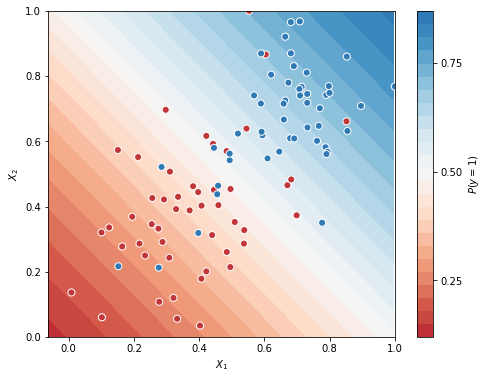

In [8]:
# plotting logistic regression decision boundary
xx, yy = np.mgrid[X.min().min():X.max().max():0.01, X.min().min():X.max().max():0.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf_lr.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X['x1'], X['x2'], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min().min(), X.max().max()), ylim=(y.min(), y.max()),
       xlabel="$X_1$", ylabel="$X_2$")